# 用 Matplotlib 绘图
用 Matplotlib 创建柱状图，显示用 groupby 和查询功能做出的结论。

In [1]:
# 导入所需数据包并加载 `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

df =pd.read_csv('winequality_edited_addcut.csv')

matplotlib默认不支持中文，显示中文会出现乱码，需要进行如下设置  
参考答案：https://www.zhihu.com/question/25404709

In [19]:
#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus']=False

### #1: 酒精含量高的酒是否评分较高？
创建柱状图，用一个条柱表示酒精含量低的酒样本，另一个条柱表示酒精含量高的酒样本。第一个条柱已填充了数据。

In [2]:
# 用查询功能选择每个组，并获取其平均质量
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

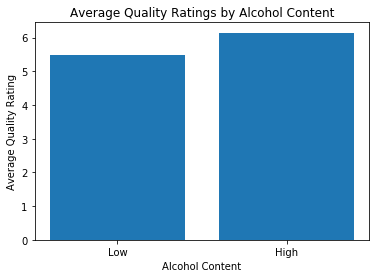

In [3]:
# 用合适的标签创建柱状图
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: 口感较甜的酒是否评分较高？
创建柱状图，用一个条柱表示残留糖分低的酒样本，另一个条柱表示残留糖分高的酒样本。

In [5]:
# 用查询功能选择每个组，并获取其平均质量

df.rename(columns={'residual sugar':'residual_sugar'},inplace=True)
# 选择残留糖分小于中位数的样本
low_sugar =df.query('residual_sugar < 3')
# 选择残留糖分大于等于中位数的样本
high_sugar =df.query('residual_sugar >= 3')

# 获取低糖分组和高糖分组的平均质量评分
low_sugar['quality'].mean()
high_sugar['quality'].mean()

### 使用 axis 函数指定坐标轴显示的范围：

`plt.axis([xmin, xmax, ymin, ymax])`

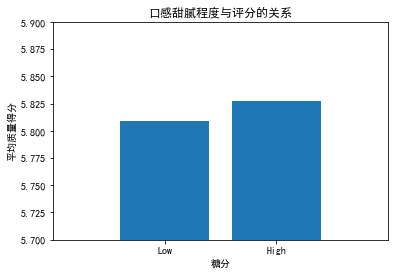

In [20]:
# 用合适的标签创建柱状图
plt.axis([0,3,5.7,5.9])
locations = [1, 2]
heights = [low_sugar['quality'].mean(),high_sugar['quality'].mean()]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('口感甜腻程度与评分的关系')
plt.xlabel('糖分')
plt.ylabel('平均质量得分');

### #3: 哪个酸度水平(acidity_levels)的平均评分最高？
创建柱状图，四个酸度水平分别用一个条柱表示。

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
acidity_levels          6496 non-null object
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [31]:
# 使用分组功能获取每个酸度水平的平均质量
df_mean=df['quality'].groupby(df['acidity_levels']).mean()
df_mean

acidity_levels
High               5.783343
Low                5.859593
Medium             5.850832
Moderately High    5.784540
Name: quality, dtype: float64

In [33]:
acidity_High_value=df_mean[0]
acidity_Low_value=df_mean[1]
acidity_Medium_value=df_mean[2]
acidity_ModeratelyHigh_value=df_mean[3]

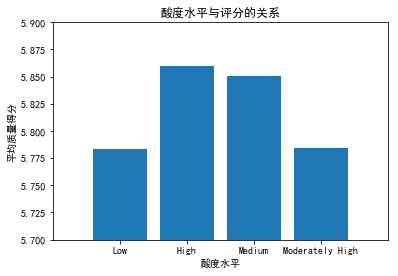

In [36]:
# 用合适的标签创建柱状图

plt.axis([0,5,5.7,5.9])
locations = [1, 2,3,4]
heights = [acidity_High_value,acidity_Low_value,acidity_Medium_value,acidity_ModeratelyHigh_value]
labels = ['Low', 'High','Medium','Moderately High']
plt.bar(locations, heights, tick_label=labels)
plt.title('酸度水平与评分的关系')
plt.xlabel('酸度水平')
plt.ylabel('平均质量得分');

### 附加题：为 #3 中的数据创建线图
可以使用 pyplot 的 [绘图](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) 功能进行创建。

将线图与柱状图相比较。如果用线图代替柱状图，会对数据结论产生什么影响？